In [16]:
import pandas as pd
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [17]:
pxp = []
cols = ['posteam', 'down', 'yrdline100', 'ydstogo', 'PlayType']
# 2009 to 2017
for year in range(2009, 2017):
    plays = pd.read_csv('NFL_Data/pxp_{}.csv'.format(year), usecols=cols)
    pxp.append(plays)
    
pxp = pd.concat(pxp)
pxp = pxp.loc[(pxp['down'] == 4) & (pxp['PlayType'] != 'No Play') & (pxp['PlayType'] != 'QB Kneel')]
pxp['down'] = pxp['down'].apply(lambda down: int(down))
pxp['yrdline100'] = pxp['yrdline100'].apply(lambda yd: int(yd))
pxp['ydstogo'] = pxp['ydstogo'].apply(lambda yd: int(yd))
pxp['posteam'] = pxp['posteam'].apply(lambda team: str(team))

In [18]:
def getTeamMapping(condensed=True):
    mapping = {}
    for index, row in pxp.iterrows():
        posteam = row['posteam']
        yrdline100 = row['yrdline100']
        ydstogo = row['ydstogo']
        playtype = row['PlayType']
        if condensed:
            if playtype != 'Field Goal' and playtype != 'Punt':
                playtype = 'Go For It'       
        if posteam in mapping:
            yrdline100dict = mapping[posteam]
            if yrdline100 in yrdline100dict:
                ydstogomapping = yrdline100dict[yrdline100]
                if ydstogo in ydstogomapping:
                    playtypefreq = ydstogomapping[ydstogo]
                    if playtype in playtypefreq:
                        playtypefreq[playtype] += 1
                    else:
                        playtypefreq[playtype] = 1
                else:
                    ydstogomapping[ydstogo] = {}
                    playtypefreq = ydstogomapping[ydstogo]
                    playtypefreq[playtype] = 1
            else:
                yrdline100dict[yrdline100] = {}
                ydstogomapping = yrdline100dict[yrdline100]
                ydstogomapping[ydstogo] = {}
                playtypefreq = ydstogomapping[ydstogo]
                playtypefreq[playtype] = 1
        else:
            mapping[posteam] = {}
            yrdline100dict = mapping[posteam]
            yrdline100dict[yrdline100] = {}
            ydstogomapping = yrdline100dict[yrdline100]
            ydstogomapping[ydstogo] = {}
            playtypefreq = ydstogomapping[ydstogo]
            playtypefreq[playtype] = 1
    return mapping

In [19]:
teammap = getTeamMapping()
mapping = teammap
mapping

{'ARI': {1: {1: {'Field Goal': 2, 'Go For It': 3}},
  2: {1: {'Field Goal': 1}},
  3: {2: {'Go For It': 1}, 3: {'Field Goal': 7, 'Go For It': 1}},
  4: {3: {'Field Goal': 2}, 4: {'Field Goal': 4}},
  5: {2: {'Go For It': 1}, 5: {'Field Goal': 9}},
  6: {6: {'Field Goal': 3, 'Go For It': 1}},
  7: {2: {'Field Goal': 1},
   3: {'Field Goal': 1},
   4: {'Field Goal': 1},
   7: {'Field Goal': 1, 'Go For It': 1}},
  8: {2: {'Field Goal': 1}, 3: {'Field Goal': 1}},
  9: {1: {'Field Goal': 1},
   2: {'Field Goal': 1},
   3: {'Field Goal': 2, 'Go For It': 1},
   5: {'Field Goal': 1},
   8: {'Field Goal': 1},
   9: {'Field Goal': 4}},
  10: {1: {'Go For It': 1},
   2: {'Field Goal': 2},
   6: {'Go For It': 1},
   8: {'Field Goal': 1},
   9: {'Field Goal': 1},
   10: {'Field Goal': 1}},
  11: {2: {'Field Goal': 1},
   5: {'Field Goal': 1},
   7: {'Field Goal': 1},
   8: {'Field Goal': 1},
   10: {'Field Goal': 1, 'Go For It': 1},
   11: {'Field Goal': 3, 'Go For It': 1}},
  12: {1: {'Go For It':

In [20]:
def playteamfrequency(team, yrdLine, ydstogo):
    if yrdLine <= 0 or yrdLine >= 100:
        raise ValueError('Invalid yard line')
    if team not in mapping:
        raise ValueError('No such team ' + team + ' in the given data.')
    if yrdLine not in mapping[team]:
        raise ValueError('No such YrdLine found for ' + team + ' in the data.')
    if ydstogo not in mapping[team][yrdLine]:
        raise ValueError('No plays 4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    playfrequencies = mapping[team][yrdLine][ydstogo]
    playTypes = ['Go For It', 'Punt', 'Field Goal']
    frequency = []

    if 'Go For It' in playfrequencies:
        frequency.append(playfrequencies['Go For It'])
    else:
        frequency.append(0)
            
    if 'Punt' in playfrequencies:
        frequency.append(playfrequencies['Punt'])
    else:
        frequency.append(0)
        
    if 'Field Goal' in playfrequencies:
        frequency.append(playfrequencies['Field Goal'])
    else:
        frequency.append(0)


    #plt.bar(playTypes, frequency)
    #plt.xlabel('Play Type')
    #plt.ylabel('Frequency')
    #plt.title('Team: ' + team + ' at 4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    #plt.show()
            
    return frequency

In [21]:
playteamfrequencies = playteamfrequency('ATL', 1, 1)

In [22]:
def clean(filtered_map):
    new_map = {}
    for i in range(99):
        for j in range(9):
            if j in filtered_map:
                if not len(filtered_map[i][j]) == 0:
                    new_map[i] = {}
                    

In [23]:
def getBiggestPlay(team, yrdLine, yrdstogo): 
    countPlays = playteamfrequency(team, yrdLine, yrdstogo)
    
    max = countPlays[0]
    maxIndex = 0
    for i in range(1, len(countPlays)):
        if countPlays[i] > max:
            max = countPlays[i]
            maxIndex = i
    if maxIndex == 0:
        return 'Go For It', max
    elif maxIndex == 1:
        return 'Punt', max
    elif maxIndex == 2:
        return 'Field Goal', max

In [24]:
def getmostcommonplaybyteam(team):
    filtered_map = {}
    teamdict = mapping[team]
    
    
    #most common is a 2D dictionary in which is organized by yrdline and yrds to go.
    #it stores 1 of 3 possible strings which shows the most common play on 4th down
    most_common = {}
    
    #number of most common plays is also a 2D dictionary in which is organized by yrdline and yrds to go.
    #At yrd Line L, and yrds to go G, it stores the number of times play most_common[L][G] was made.
    number_of_most_common_plays = {}
    
    for i in range(1, 100):
        if i in teamdict:
            yrdline100dict = teamdict[i]
            most_common[i] = {}
            number_of_most_common_plays[i] = {}
            for j in range(1, 10):
                if j in yrdline100dict:
                    most_common_play, number_of_plays = getBiggestPlay(team, i, j)
                    most_common[i][j] = most_common_play
                    number_of_most_common_plays[i][j] = number_of_plays
    
    
    return pd.DataFrame(most_common), most_common, number_of_most_common_plays

In [25]:
df, mostcommon, num_most_common = getmostcommonplaybyteam('NE')
df


,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,96,98,99
1,Go For It,Field Goal,Go For It,Go For It,Go For It,Go For It,NaN,Field Goal,NaN,NaN,...,Go For It,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Field Goal,NaN,NaN,Field Goal,Field Goal,Go For It,NaN,Field Goal,NaN,...,NaN,NaN,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Field Goal,NaN,Field Goal,Field Goal,NaN,Field Goal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Field Goal,NaN,NaN,NaN,NaN,NaN,Go For It,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Field Goal,Field Goal,Field Goal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Field Goal,Field Goal,Field Goal,Field Goal,Field Goal,...,Punt,Punt,NaN,NaN,NaN,Punt,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,Field Goal,Field Goal,NaN,...,NaN,NaN,NaN,NaN,NaN,Punt,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,NaN,NaN,...,NaN,Punt,Punt,Punt,NaN,NaN,Punt,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,NaN,...,NaN,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cmap = plt.cm.magma

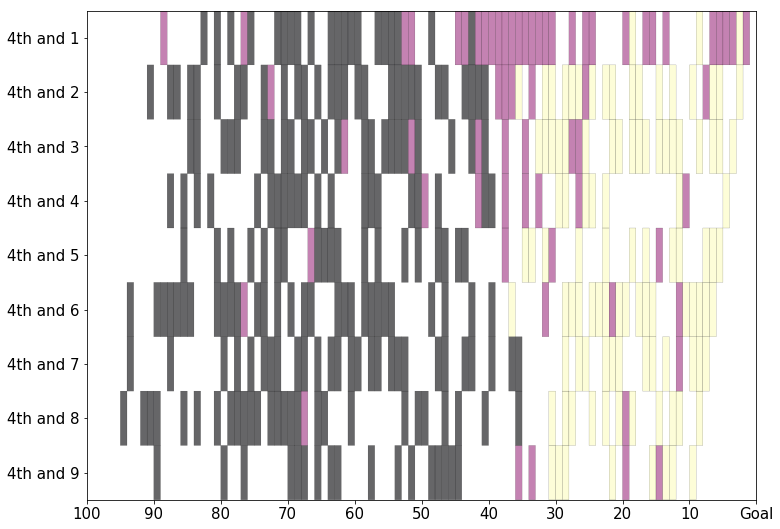

In [27]:
data = np.zeros((9, 99))
val = 0
for i in range(1, 10):
    for j in range(1, 100):
        if j not in mostcommon:
            val = np.nan
        else:
            if i in mostcommon[j]:
                decision = mostcommon[j][i]
                if decision == 'Punt':
                    val = 0
                elif decision == 'Go For It':
                    val = 5
                elif decision == 'Field Goal':
                    val = 10
            else:
                val = np.nan
        data[i - 1, j - 1] = val
        
            
data = data[::-1,::-1]

fig, ax = plt.subplots(figsize=(12, 9))

ax.pcolor(
    data,
    vmin = 1,
    vmax = 10,
    edgecolors='k', 
    linewidths=.2,
    cmap=cmap,
    alpha=.6
);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([yd - .5 for yd in range(1, 10)])
ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [1]:
import numpy as np
def printHeatMap(team):
    playfrequencies = {}
    data = np.zeros((9, 99))
    if team not in mapping:
        raise ValueError('No such team ' + team + ' in the given data.')
    for i in range(9):
        for j in range(99):
            if j in mapping[team]:
                if i in mapping[team][j]:
                    playfrequencies[j] = {}
                    playfrequencies[j][i] = playteamfrequency(team, j, i)
                    freq = playfrequencies[j][i]
                    goforit = freq[0]
                    punt = freq[1]
                    fieldgoal = freq[2]
                    total = goforit + punt + fieldgoal
                    goforit = goforit / total
                    punt = punt / total
                    fieldgoal = fieldgoal / total
                    val = 5 + punt * -5 + fieldgoal * 5
                else:
                    val = np.nan
            else:
                val = np.nan
            data[i - 1, j - 1] = val
    data = data[::-1,::-1]

    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    ax.pcolor(data, edgecolors='k', linewidths=.2, cmap=cmap, alpha=.6)
    ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
    ax.set_yticks([yd - .5 for yd in range(1, 10)])
    ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
    ax.tick_params(axis='both', which='major', labelsize=15)

    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=[0, 0.5, 1])
    cb.ax.set_yticklabels(['Punt', 'Go For It', 'Field Goal']) 

    plt.show()

In [2]:
printHeatMap('NE')

NameError: name 'mapping' is not defined

In [44]:
# Dictionary representing yard line on field mapped to another dictionary which maps yard line until 1st down mapped to another
# dictionary which maps play type to frequency
def getMapping(condensed=True):
    mapping = {}
    for index, row in pxp.iterrows():
        yrdline100 = row['yrdline100']
        ydstogo = row['ydstogo']
        playtype = row['PlayType']
        if condensed:
            if playtype != 'Field Goal' and playtype != 'Punt':
                playtype = 'Go For It'
        if yrdline100 in mapping:
            ydstogomapping = mapping[yrdline100]
            if ydstogo in ydstogomapping:
                playtypefreq = ydstogomapping[ydstogo]
                if playtype in playtypefreq:
                    playtypefreq[playtype] += 1
                else:
                    playtypefreq[playtype] = 1
            else:
                ydstogomapping[ydstogo] = {}
                playtypefreq = ydstogomapping[ydstogo]
                playtypefreq[playtype] = 1
        else:
            mapping[yrdline100] = {}
            ydstogomapping = mapping[yrdline100]
            ydstogomapping[ydstogo] = {}
            playtypefreq = ydstogomapping[ydstogo]
            playtypefreq[playtype] = 1
    return mapping

In [26]:
mapping = getMapping()
mapping = dict(collections.OrderedDict(sorted(mapping.items())))

In [27]:
def playfrequency(ydstogo, yrdLine):
    if yrdLine <= 0 or yrdLine >= 100:
        raise ValueError('Invalid yard line')
    if ydstogo not in mapping[yrdLine]:
        raise ValueError('No plays 4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    playfrequencies = mapping[yrdLine][ydstogo]
    playTypes = ['Go For It', 'Punt', 'Field Goal']
    frequency = []

    if 'Go For It' in playfrequencies:
        frequency.append(playfrequencies['Go For It'])
    else:
        frequency.append(0)
            
    if 'Punt' in playfrequencies:
        frequency.append(playfrequencies['Punt'])
    else:
        frequency.append(0)
        
    if 'Field Goal' in playfrequencies:
        frequency.append(playfrequencies['Field Goal'])
    else:
        frequency.append(0)


    plt.bar(playTypes, frequency)
    plt.xlabel('Play Type')
    plt.ylabel('Frequency')
    plt.title('4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    plt.show()
            
    return playfrequencies

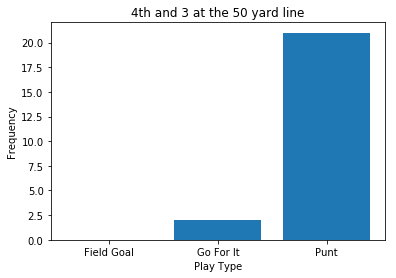

{'Go For It': 2, 'Punt': 21}

In [28]:
playfrequency(3, 50)

In [7]:
df = pd.DataFrame(mapping)

In [8]:
mostcommon = df.applymap(lambda dct: max(dct, key=lambda k: dct[k]) if type(dct) == dict else '')

In [9]:
cmap = plt.cm.magma

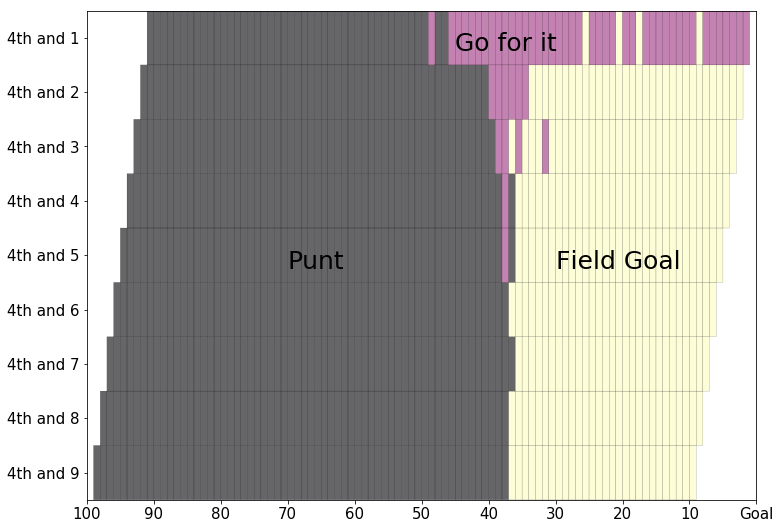

In [10]:
data = np.zeros((9, 99))
for i in range(9):
    for j in range(99):
        decision = mostcommon.loc[i + 1, j + 1]
        if decision == 'Punt':
            val = 0
        elif decision == 'Go For It':
            val = 5
        elif decision == 'Field Goal':
            val = 10
        else:
            val = np.nan
        data[i, j] = val
data = data[::-1,::-1]

fig, ax = plt.subplots(figsize=(12, 9))

ax.pcolor(
    data,
    vmin = 1,
    vmax = 10,
    edgecolors='k', 
    linewidths=.2,
    cmap=cmap,
    alpha=.6
);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([yd - .5 for yd in range(1, 10)])
ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
ax.text(55, 8.25, 'Go for it', size=25)
ax.text(30, 4.25, 'Punt', size=25)
ax.text(70, 4.25, 'Field Goal', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

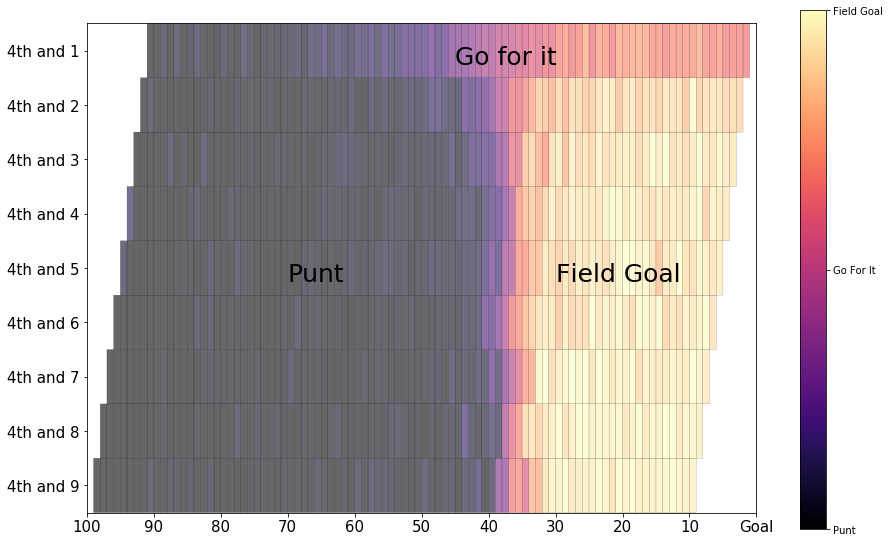

In [11]:
data = np.zeros((9, 99))
for i in range(9):
    for j in range(99):
        playfrequencies = df.loc[i + 1, j + 1]
        if type(playfrequencies) == dict:
            if 'Punt' in playfrequencies:
                punt = playfrequencies['Punt']
            else:
                punt = 0
                
            if 'Go For It' in playfrequencies:
                goforit = playfrequencies['Go For It']
            else:
                goforit = 0

            if 'Field Goal' in playfrequencies:
                fieldgoal = playfrequencies['Field Goal']
            else:
                fieldgoal = 0
            
            total = goforit + punt + fieldgoal
            goforit = goforit / total
            punt = punt / total
            fieldgoal = fieldgoal / total
            val = 5 + punt * -5 + fieldgoal * 5
        else:
            val = np.nan
        data[i, j] = val
data = data[::-1,::-1]

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

ax.pcolor(data, edgecolors='k', linewidths=.2, cmap=cmap, alpha=.6)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([yd - .5 for yd in range(1, 10)])
ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
ax.text(55, 8.25, 'Go for it', size=25)
ax.text(30, 4.25, 'Punt', size=25)
ax.text(70, 4.25, 'Field Goal', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)

ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=[0, 0.5, 1])
cb.ax.set_yticklabels(['Punt', 'Go For It', 'Field Goal']) 

plt.show()

In [ ]:
def getChartOfTeam(team):
    for year in range(2009, 2017):